
# APS 5 - Questões com auxílio do Pandas


** Nome: ** <font color=blue> Maria Eduarda Bicalho </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [148]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [149]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


In [150]:
df.columns=['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'DepthError', 'Depth Seismic Stations', 'Magnitude', 'MagnitudeType', 'MagnitudeError', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']

## Liste as primeiras linhas do DataFrame

In [151]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,DepthError,Depth Seismic Stations,Magnitude,MagnitudeType,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [152]:
df.loc[df.Latitude>0,"Hemisferio"]="Norte"
df.loc[df.Latitude<0,"Hemisferio"]="Sul"
df.tail()

,Date,Time,Latitude,Longitude,Type,Depth,DepthError,Depth Seismic Stations,Magnitude,MagnitudeType,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisferio
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed,Norte
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed,Norte
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed,Norte
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed,Sul
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed,Norte


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

In [153]:
df.Magnitude.describe()
faixa=np.arange(5.5,9.5,0.5)
e=pd.cut(df.Magnitude,bins=faixa,right=False)
ut=(e.value_counts(sort=False,normalize=True)*100).round(decimals=1) 

(5.3, 9.3)

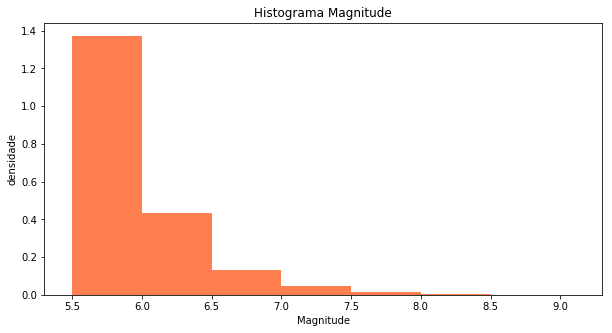

In [154]:
plot=df.Magnitude.plot.hist(bins=faixa, title="Histograma Magnitude",normed= True, figsize=(10,5),color=("coral"))
plt.xlabel('Magnitude')
plt.ylabel('densidade')
plt.xlim(5.3,9.3)

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [155]:
fit(df.Magnitude, loc=0, scale=1)

NameError: name 'fit' is not defined

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

# NAO DEU CERTO

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

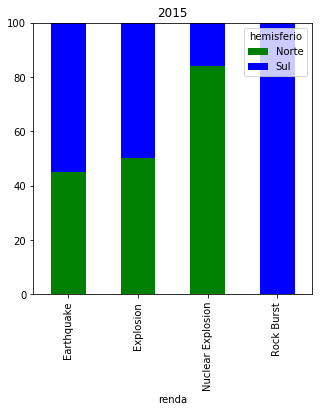

In [156]:
crt=(pd.crosstab(df.Hemisferio,df.Type,margins=False,rownames=['hemisferio'], colnames=['type'],normalize='columns')*100).round(decimals=0)
plot = crt.T.plot(kind='bar', stacked=True,title='2015',figsize=(5, 5),color=("g","b"))
plot.set_ylim([0, 100])
plt.xlabel('renda')
plt.show()

### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [192]:
df.Type.shape
#23412
df[df.Type == "Earthquake"].shape
#23232
df[(df.Type == "Earthquake")&(df.Hemisferio == "Norte")].shape
#10468

df[df.Hemisferio == "Norte"].shape
#10617



print("Probabilidade:")
print((((23232/23412)*(10468/23232))/(10617/23412))*100)

Probabilidade:
98.5965903739286


Explique o seu raciocínio

##### Peguei a probabilidade de acontecer um terremoto e multipliqui pela probabilidade de ser no norte, seguindo a linha de pensamento da árvore de proabilidades.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [201]:
df[(df.Hemisferio == "Norte")].shape
#10617
pn=10617/23412

df[(df.Type == "Nuclear Explosion")&(df.Hemisferio == "Norte")].shape
#147
pnnex=147/10617

print("Probabilidade:")
print((pnnex))

crt=(pd.crosstab(df.Hemisferio,df.Type,margins=True,rownames=['hemisferio'], colnames=['type'], normalize=False))
print(crt)

Probabilidade:
0.013845719129697655
type        Earthquake  Explosion  Nuclear Explosion  Rock Burst    All
hemisferio                                                             
Norte            10468          2                147           0  10617
Sul              12763          2                 28           1  12794
All              23231          4                175           1  23411


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

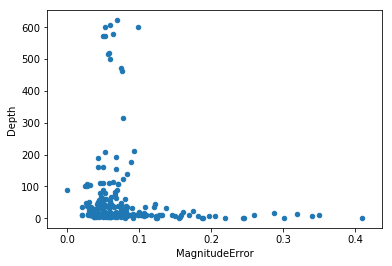

In [181]:
 df.plot(kind='scatter', x='MagnitudeError', y='Depth')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [160]:
cov=np.cov(df.MagnitudeError,df.Depth)[0,1]
cor=np.corrcoef(df.Magnitude,df.Depth)[0,1]
print(cor)

0.0234573124921


Explique o que significa o valor da correlação calculada acima? 

##### O valor da correlação calculado acima significa que o a relação entre as duas variáveis está próximo de 0, e distante de 1, ou seja não está perto de ser uma reta, dessa forma a relação entre essas duas variáveis não é linear.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [161]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

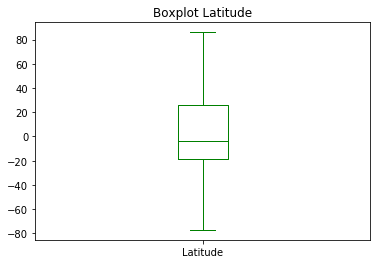

In [162]:
plot = df.Latitude.plot(kind='box',title='Boxplot Latitude', color= 'green')
plt.show()

In [163]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

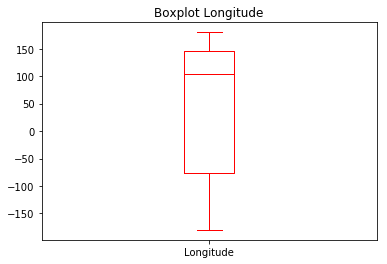

In [164]:
plot = df.Longitude.plot(kind='box',title='Boxplot Longitude', color='red')
plt.show()

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [189]:

df.shape
#23412

df[df.MagnitudeType == "MB"].shape
#3761
pmb=3761/23412
df[df.Type == "Nuclear Explosion"].shape
#175
pne=175/23412

df[(df.Type == "Nuclear Explosion")&(df.Hemisferio == "Norte")].shape
#147
pnen=147/23412
df[(df.MagnitudeType == "MB")&(df.Hemisferio == "Norte")].shape #mais um
#1684
pmbn=1684/23412

df[(df.Type == "Nuclear Explosion")&(df.Hemisferio == "Sul")].shape
#28
pnes=28/23412
df[(df.MagnitudeType == "MB")&(df.Hemisferio == "Sul")].shape
#2077
pmbs=2077/23412

pnorte=((pmbn/pmb)*(pnen/pne))
psul=((pmbs/pmb)*(pnes/pne))
      



print(psul)
print(pnorte)

print("Norte")

0.08835947886200478
0.3761127359744748
Norte
